In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium

sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
# from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
# from xgboost.sklearn import XGBRegressor
# from lightgbm import LGBMRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline



In [3]:
stations = pd.read_csv('C:\Asus WebStorage\psabin@gmail.com\MySyncFolder\Data Science Course\Capital Bikeshare\saved_stations')
display(stations.head())

,Unnamed: 0,station_name,start_count,end_count,net_total,daily_usage,%_bikes_added,weekday_am_net,weekday_pm_net,fun_am_net,fun_pm_net,start_station_id,start_lat,start_lng,normalized_net_total,lat_dms,lng_dms
0,0,10th & E St NW,19496.0,22832.0,3336.0,46.46,53.9,8.10,-4.63,4.36,-0.22,31256.0,38.895914,-77.026064,0.757391,"38°53'45.29""N","77°1'33.83""W"
1,1,10th & Florida Ave NW,16520.0,16299.0,-221.0,36.03,49.7,-2.82,2.54,-1.23,1.09,31120.0,38.920387,-77.025672,0.549148,"38°55'13.39""N","77°1'32.42""W"
2,2,10th & G St NW,14823.0,19982.0,5159.0,38.21,57.4,7.47,-1.89,5.05,0.81,31274.0,38.898243,-77.026235,0.864118,"38°53'53.68""N","77°1'34.45""W"
3,3,10th & H St NE,9604.0,10069.0,465.0,21.59,51.2,-2.79,3.48,-1.08,1.14,31672.0,38.899984,-76.992725,0.589310,"38°53'59.94""N","76°59'33.81""W"
4,4,10th & K St NW,26747.0,26712.0,-35.0,58.68,50.0,3.32,-3.22,-1.82,1.44,31263.0,38.902400,-77.026220,0.560037,"38°54'8.64""N","77°1'34.39""W"


In [4]:
stations.drop(['lat_dms', 'lng_dms', 'Unnamed: 0'], axis=1, inplace=True)

In [5]:
display(stations.head())

,station_name,start_count,end_count,net_total,daily_usage,%_bikes_added,weekday_am_net,weekday_pm_net,fun_am_net,fun_pm_net,start_station_id,start_lat,start_lng,normalized_net_total
0,10th & E St NW,19496.0,22832.0,3336.0,46.46,53.9,8.10,-4.63,4.36,-0.22,31256.0,38.895914,-77.026064,0.757391
1,10th & Florida Ave NW,16520.0,16299.0,-221.0,36.03,49.7,-2.82,2.54,-1.23,1.09,31120.0,38.920387,-77.025672,0.549148
2,10th & G St NW,14823.0,19982.0,5159.0,38.21,57.4,7.47,-1.89,5.05,0.81,31274.0,38.898243,-77.026235,0.864118
3,10th & H St NE,9604.0,10069.0,465.0,21.59,51.2,-2.79,3.48,-1.08,1.14,31672.0,38.899984,-76.992725,0.589310
4,10th & K St NW,26747.0,26712.0,-35.0,58.68,50.0,3.32,-3.22,-1.82,1.44,31263.0,38.902400,-77.026220,0.560037


In [85]:
st_coordinates = stations[['start_lat', 'start_lng']]

In [69]:
added_ratio = stations['%_bikes_added']
display(added_ratio.head())

0    53.9
1    49.7
2    57.4
3    51.2
4    50.0
Name: %_bikes_added, dtype: float64

In [68]:
net_total = stations['net_total']

In [70]:
display(added_ratio.shape)

(818,)

In [71]:

coordinates_train, coordinates_test, added_ratio_train, added_ratio_test = train_test_split(st_coordinates,added_ratio,test_size=0.2, random_state=16)

In [72]:
high_usage_stations = stations[stations['daily_usage'] > 4.685]
high_st_coordinates = high_usage_stations[['start_lat', 'start_lng']]
high_added_ratio = high_usage_stations['%_bikes_added']
high_net_total = high_usage_stations['net_total']
high_coordinates_train, high_coordinates_test, high_added_ratio_train, high_added_ratio_test = train_test_split(high_st_coordinates,high_added_ratio,test_size=0.2, random_state=16)
high_co_train, high_co_test, high_net_total_train, high_net_total_test = train_test_split(high_st_coordinates,high_net_total,test_size=0.2, random_state=16)

New splits for just long and just lat (high usage stations)

In [86]:
st_long = high_usage_stations[['start_lng']]
st_lat = high_usage_stations[['start_lat']]
lat_train, lat_test, lat_added_train, lat_added_ratio_test = train_test_split(st_lat,high_added_ratio,test_size=0.2, random_state=16)
long_train, long_test, long_added_train, long_added_ratio_test = train_test_split(st_lat,high_added_ratio,test_size=0.2, random_state=16)

In [73]:
def model_accuracy_comparison(X_train, y_train, X_test, y_test):
    # Create a dictionary of regression models
    reg_models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Decision Tree': DecisionTreeRegressor(),
        'SGD Regressor': SGDRegressor(), 
        'Elastic Net': ElasticNet(), 
        'Bayesian Ridge': BayesianRidge(),
        'Gradient Boosting Regressor': GradientBoostingRegressor(),
        'SVR': SVR(),
        'Kernel Ridge': KernelRidge()
    }

    for name, model in reg_models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        predictions = model.predict(X_test)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)

        # Print the metrics
        print(f"{name}:")
        print(f" Mean Absolute Error: {mae:.2f}")
        print(f" Mean Squared Error: {mse:.2f}")
        print(f" Root Mean Squared Error: {rmse:.2f}")
        print(f" R-squared: {r2:.2f}\n")


Polynomial Regression Model

In [78]:
# Create a polynomial regression model
# This is an example of using a 2nd-degree polynomial, but you can experiment with the degree
poly_linear = Pipeline([
    ('polynomial', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())
])

Comparing models

In [80]:
def model_accuracy_comparison_and_plot(X_train, y_train, X_test, y_test):
    # Create a dictionary of regression models
    reg_models = {
        'Decision Tree': DecisionTreeRegressor(),
        'Gradient Boosting Regressor': GradientBoostingRegressor(),
        'Polynomial Linear': poly_linear
    }

    for name, model in reg_models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        predictions = model.predict(X_test)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)

        # Print the metrics
        print(f"{name}:")
        print(f" Mean Absolute Error: {mae:.2f}")
        print(f" Mean Squared Error: {mse:.2f}")
        print(f" Root Mean Squared Error: {rmse:.2f}")
        print(f" R-squared: {r2:.2f}\n")
        
        # Plotting the results
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, predictions, alpha=0.5)
        plt.plot(y_test, y_test, color='red')  # Line for perfect predictions
        plt.title(f'{name} Predictions vs Actual')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.show()




Just Latitude results

Decision Tree:
 Mean Absolute Error: 3.66
 Mean Squared Error: 23.87
 Root Mean Squared Error: 4.89
 R-squared: 0.09



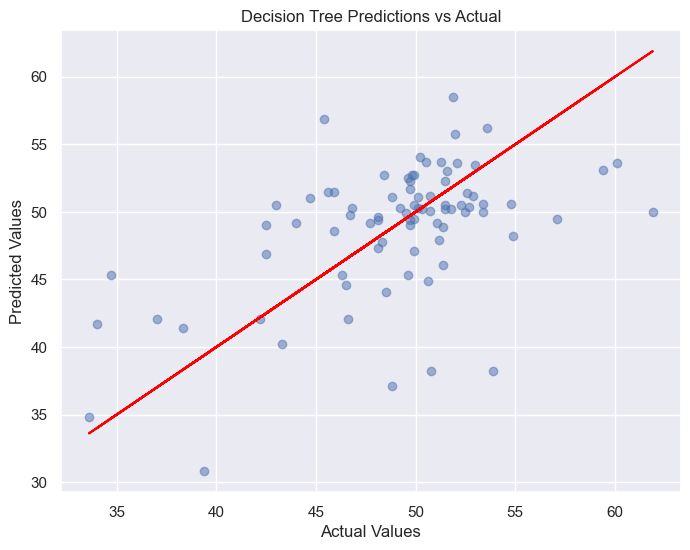

Gradient Boosting Regressor:
 Mean Absolute Error: 2.75
 Mean Squared Error: 14.42
 Root Mean Squared Error: 3.80
 R-squared: 0.45



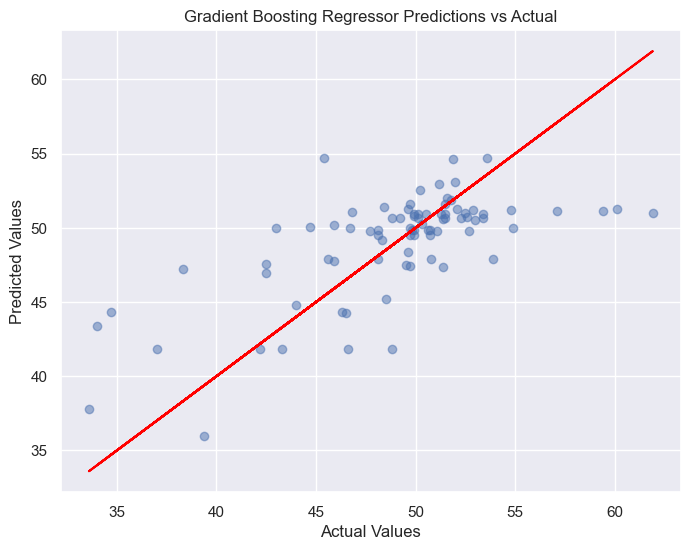

Polynomial Linear:
 Mean Absolute Error: 3.48
 Mean Squared Error: 22.51
 Root Mean Squared Error: 4.74
 R-squared: 0.14



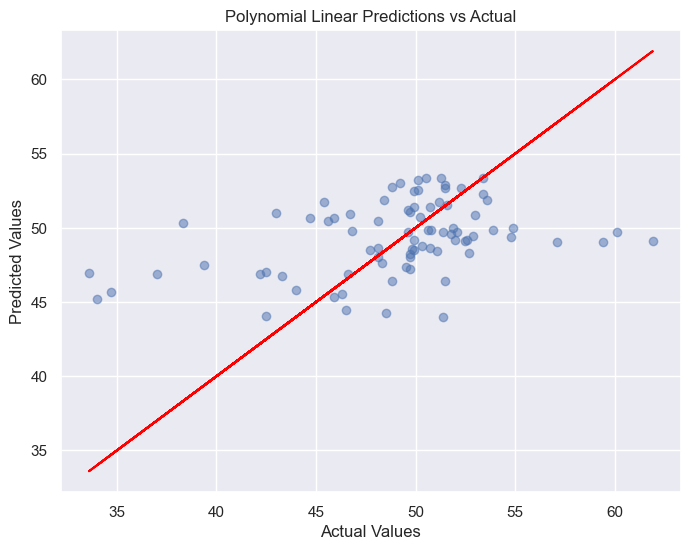

In [88]:
model_accuracy_comparison_and_plot(lat_train, lat_added_train, lat_test, lat_added_ratio_test)

Just Longditude results

Decision Tree:
 Mean Absolute Error: 3.66
 Mean Squared Error: 23.87
 Root Mean Squared Error: 4.89
 R-squared: 0.09



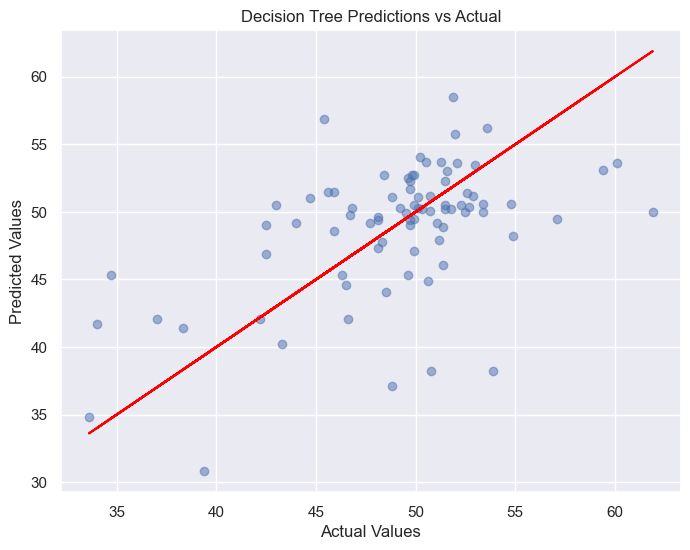

Gradient Boosting Regressor:
 Mean Absolute Error: 2.75
 Mean Squared Error: 14.42
 Root Mean Squared Error: 3.80
 R-squared: 0.45



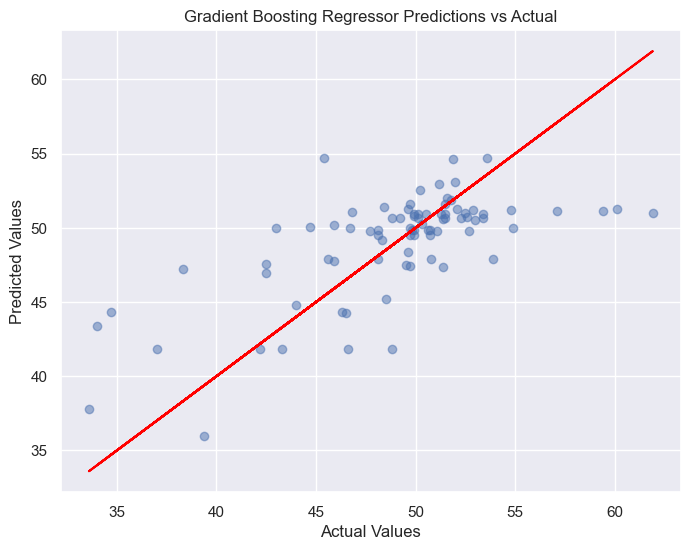

Polynomial Linear:
 Mean Absolute Error: 3.48
 Mean Squared Error: 22.51
 Root Mean Squared Error: 4.74
 R-squared: 0.14



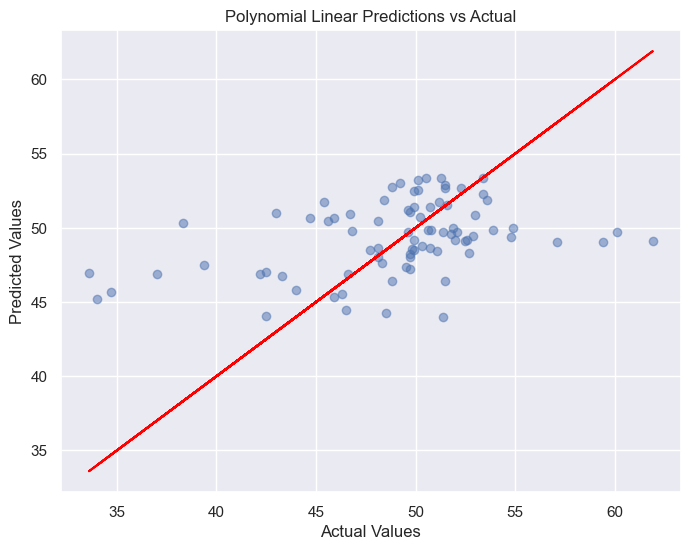

In [87]:
model_accuracy_comparison_and_plot(long_train, long_added_train, long_test, long_added_ratio_test)

In [76]:
# Train/test split
co_train, co_test, net_total_train, net_total_test = train_test_split(st_coordinates,net_total,test_size=0.2, random_state=16)

Decision Tree:
 Mean Absolute Error: 620.08
 Mean Squared Error: 2042409.51
 Root Mean Squared Error: 1429.13
 R-squared: -0.14



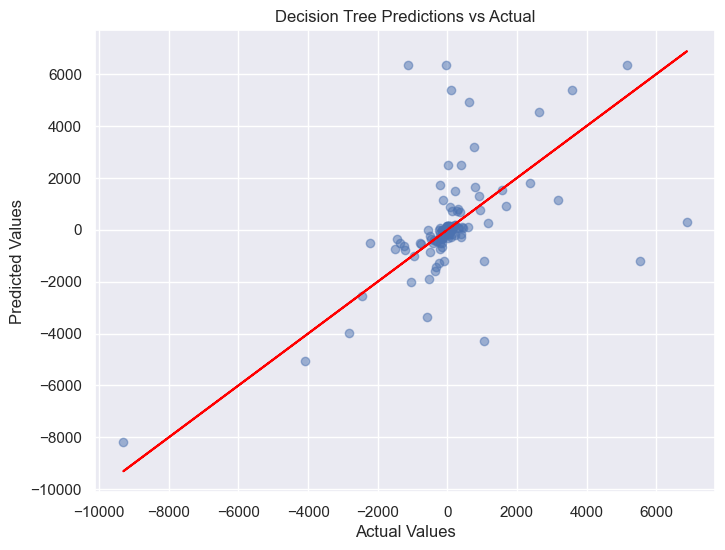

Gradient Boosting Regressor:
 Mean Absolute Error: 539.43
 Mean Squared Error: 1178130.00
 Root Mean Squared Error: 1085.42
 R-squared: 0.34



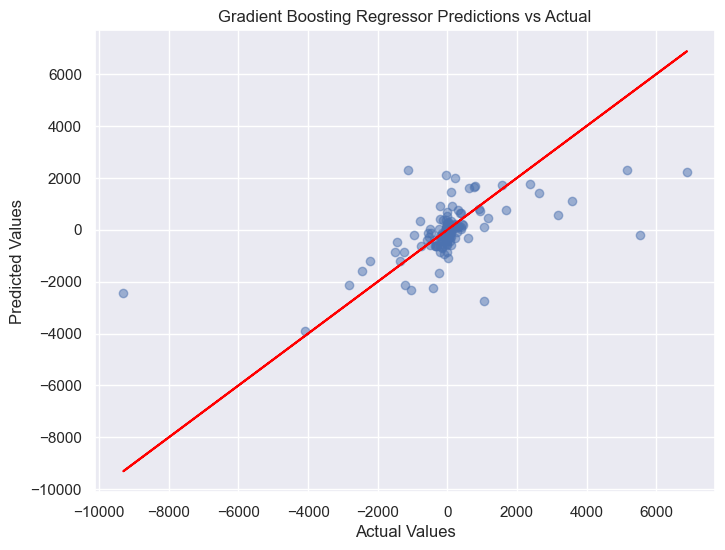

Polynomial Linear:
 Mean Absolute Error: 624.15
 Mean Squared Error: 1737852.45
 Root Mean Squared Error: 1318.28
 R-squared: 0.03



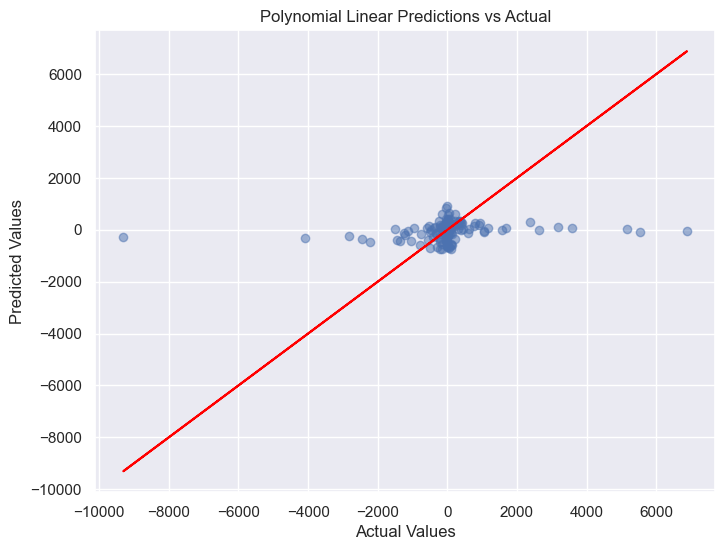

In [81]:
model_accuracy_comparison_and_plot(co_train, net_total_train, co_test, net_total_test)

Decision Tree:
 Mean Absolute Error: 2.47
 Mean Squared Error: 11.21
 Root Mean Squared Error: 3.35
 R-squared: 0.57



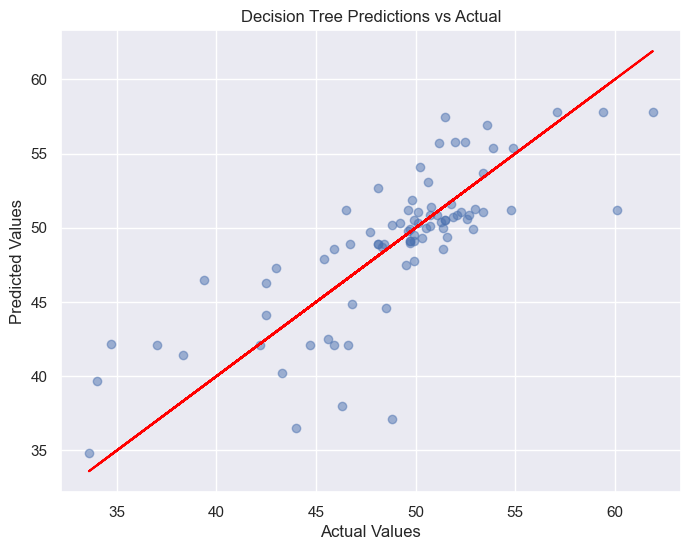

Gradient Boosting Regressor:
 Mean Absolute Error: 2.18
 Mean Squared Error: 8.79
 Root Mean Squared Error: 2.97
 R-squared: 0.66



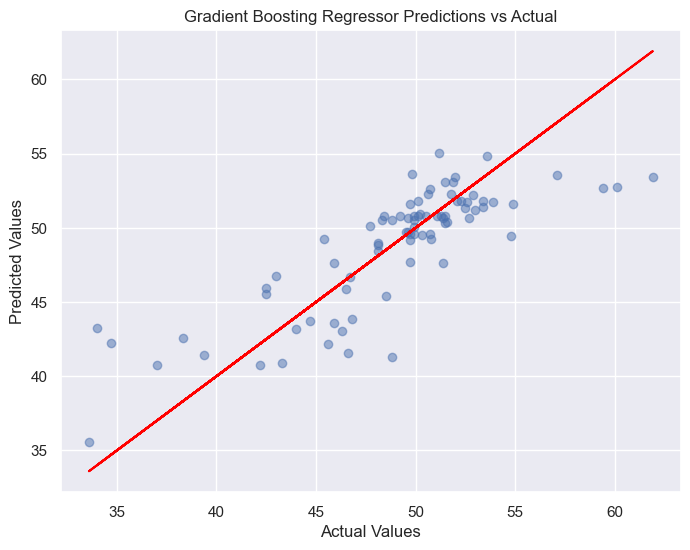

Polynomial Linear:
 Mean Absolute Error: 3.27
 Mean Squared Error: 20.45
 Root Mean Squared Error: 4.52
 R-squared: 0.22



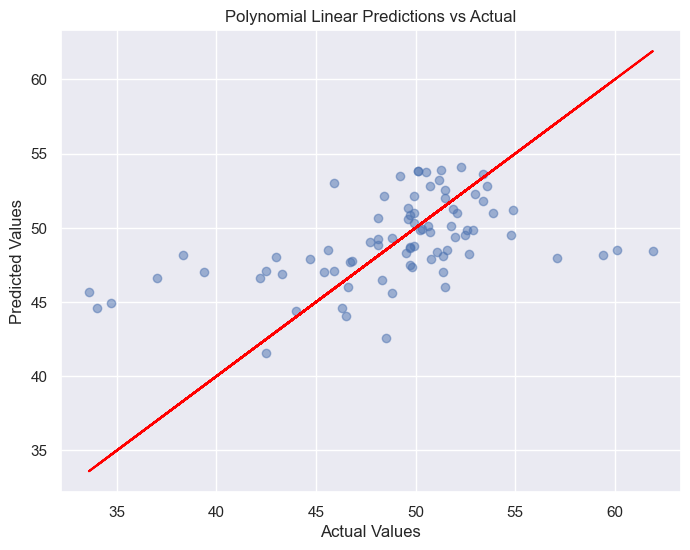

In [82]:
# Example usage
model_accuracy_comparison_and_plot(high_coordinates_train, high_added_ratio_train, high_coordinates_test, high_added_ratio_test)

Decision Tree:
 Mean Absolute Error: 1023.13
 Mean Squared Error: 2679246.25
 Root Mean Squared Error: 1636.84
 R-squared: 0.41



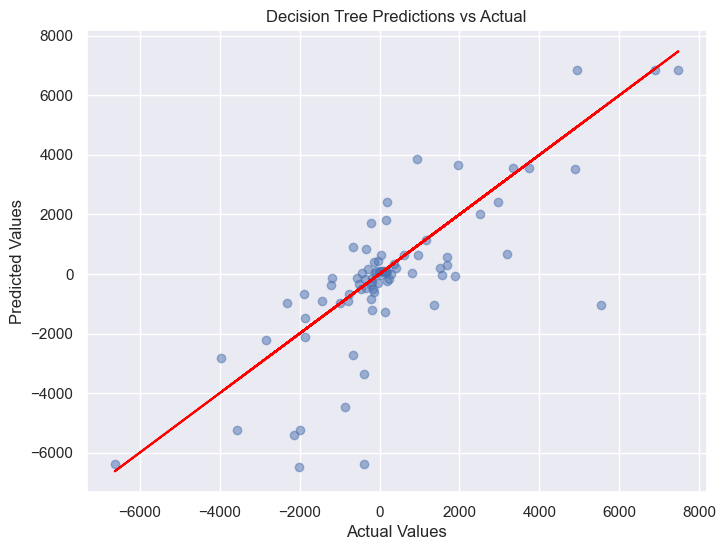

Gradient Boosting Regressor:
 Mean Absolute Error: 1130.41
 Mean Squared Error: 3132597.02
 Root Mean Squared Error: 1769.91
 R-squared: 0.31



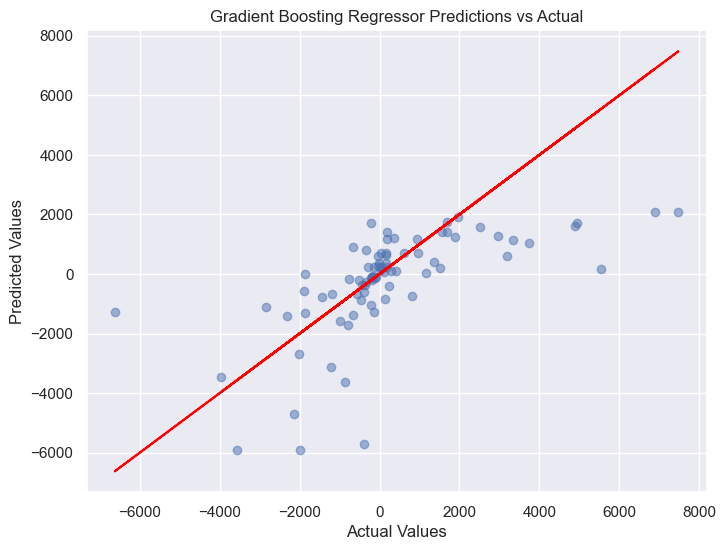

Polynomial Linear:
 Mean Absolute Error: 1438.70
 Mean Squared Error: 4509300.74
 Root Mean Squared Error: 2123.51
 R-squared: 0.01



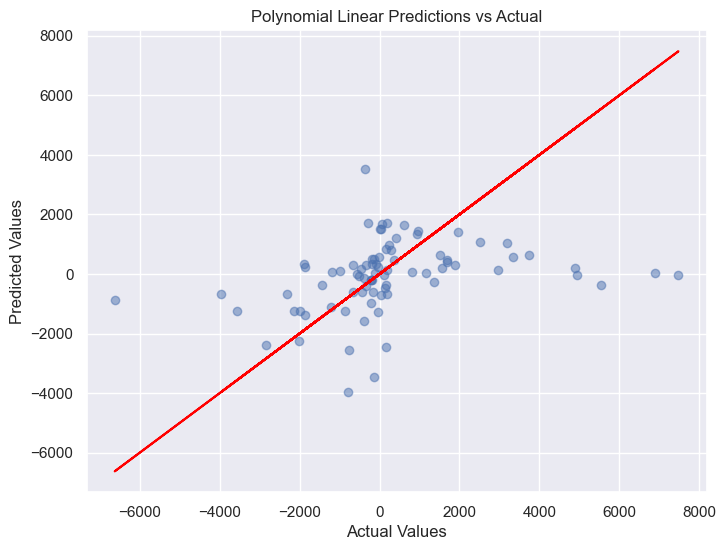

In [83]:
model_accuracy_comparison_and_plot(high_co_train, high_net_total_train, high_co_test, high_net_total_test)